# Topic Models
A topic model is a *low-rank representation* of a word co-occurrence matrix typically generated by a matrix factorization such as a Singular Value Decomposition or Non-Negative Matrix Factorization or probabilistically as in the Latent Dirichlet Allocation. 

# Topic Coherence 
a metric for automatically assessing the quality of such a topic model. 

Intrinsic and Extrinsic methods exist for computing Topic Coherence.

`mimno2011` proposes an intrinsic measure based upon point-wise mutual information between words comprising a topic. 


## `mimno2011`

Deals with the programmatic (automatic) evaluation of topics as semantically coherent concepts.

Consider that a topic is a single eigenvector of the word co-occurence matrix and a principal component is a single eigenvector of the correlation or covariance matrix, we could connect a "topic" to a "principal component" conceptually.
When displaying topics to users, each topic $t$ is generally represented as a list of the $M = 5, \dots , 20$ most probable words for that topic, in descending order of their topic-specific “collapsed” probabilities.


## Computing Coherence
Let $D(v)$ be the *document frequency* of word type $v$ (i.e. the number of documents with at least one token of type $v$) and $D(v,v')$ be *co-document frequency* of word types $v$ and $v'$ (i.e., the number of documents containing one or more tokens of type $v$ and at least one token of type $v'$), we define *topic coherence* as 
$$C(t;V^{(t)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{D(v_m^{(t)}, v_l^{(t)}) + \gamma}{D(v_l^{(t)})}$$
Where $V^{(t)}=\left(v_1^{(t))},\dots,v_M^{(t))}\right)$ is a list of the $M$ most probable words in topic $t$. A smoothing count of 1 is included to avoid taking the logarithm of zero.

### Pointwise Mutual Information

$$\text{PMI}(w_i, w_j) = \log\frac{p(w_i,w_j)}{p(w_i)p(w_j)}$$

## Coherence on a Latent Semantic Analysis


1. generate document-term matrix, $A$
1. use SVD to decompose to $A=XY$
1. consider $Y_0$, identify $M$ most probable words 
1. compute using 

   $$C(t;V^{(0)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{D(v_m^{(0)}, v_l^{(0)}) + 1}{D(v_l^{(0)})}$$

   or stated as probabilities
   
   $$C(t;V^{(0)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{p(w_i, w_j) + 1}{p(w_j)}$$
   
   this value is the coherence of a given topic

### Possible to compute using simple Mutual Information

$$C(t;V^{(0)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{p(w_i, w_j)}{p(w_i)p(w_j)} = \sum_{m=2}^M\sum_{l=1}^{m-1}\text{PMI}(w_i, w_j)$$

## Coherence on a Principal Component Analysis

1. Perform Principal Component Analysis, $A = XY$
   - $X$ your low rank model
   - $Y$ is the loadings matrix
1. Consider $Y_0$ 
1. Compute using 
   $$C(pc;V^{(0)}) = \sum_{i=1}^M\sum_{j=1}^{i-1}pc[i]\cdot\log \frac{p(f_i, f_j)}{p(f_i)p(f_j)} = \sum_{i=1}^M\sum_{j=1}^{i-1}pc[i]\cdot\text{PMI}(f_i, f_j)$$
   

Where $V^{(pc)}=\left(f_1^{(pc))},\dots,f_M^{(pc))}\right)$ is the set of the $M$ most salient features to $pc$.

Several authors have propsed methods for non-parametric methods for computing mutual information:

- A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.
- B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014.
- L. F. Kozachenko, N. N. Leonenko, “Sample Estimate of the Entropy of a Random Vector”, Probl. Peredachi Inf., 23:2 (1987), 9-16

These have been implemented in the Scikit-Learn package:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

We believe that one of the main contributions of our work is demonstrating that standard topic models do not fully utilize available co-occurrence information, and that a held-out reference corpus is therefore not required for purposes of topic evaluation.


In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import fetch_20newsgroups, load_iris, load_boston
from sklearn.decomposition import PCA



In [5]:
%matplotlib inline

In [ ]:
iris_df

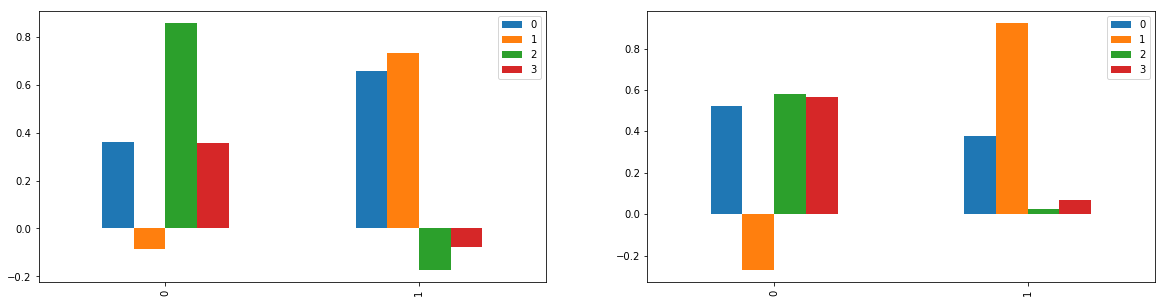

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize =(20,5))


X, y = load_iris(return_X_y=True)
iris_df = pd.DataFrame(X)
iris_sc_df = (iris_df - iris_df.mean())/iris_df.std()

pca = PCA(n_components=2)
pca.fit(iris_df)
loadings = pd.DataFrame(pca.components_)
loadings.plot(kind="bar", ax=ax[0])
pca_sc = PCA(n_components=2)
pca_sc.fit(iris_sc_df)
loadings_sc = pd.DataFrame(pca_sc.components_)
loadings_sc.plot(kind="bar", ax=ax[1])

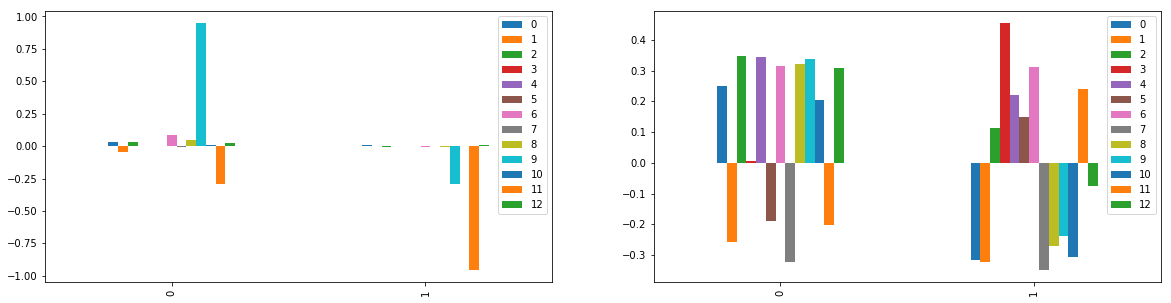

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize =(20,5))


X, y = load_boston(return_X_y=True)
boston_df = pd.DataFrame(X)
boston_sc_df = (boston_df - boston_df.mean())/boston_df.std()

pca = PCA(n_components=2)
pca.fit(boston_df)
loadings = pd.DataFrame(pca.components_)
loadings.plot(kind="bar", ax=ax[0])
pca_sc = PCA(n_components=2)
pca_sc.fit(boston_sc_df)
loadings_sc = pd.DataFrame(pca_sc.components_)
loadings_sc.plot(kind="bar", ax=ax[1])

In [9]:
iris_df.shape

(150, 4)

In [13]:
f1 = iris_df[0]
f2 = iris_df[1]
f3 = iris_df[2]
f4 = iris_df[3]
mutual_info_regression(f1, f2.values.reshape(-1,1))

$$I(X,Y) = \mathbb{E}\left[\log \frac{p(f_i, f_j)}{p(f_i)p(f_j)}\right]$$

In [8]:
X_t.shape

(150, 2)

In [ ]:
import requests, json
remoteUrl = 'https://joshua-databricks.s3-us-west-2.amazonaws.com/text-data/pagesParsed.json'
resp = requests.get(remoteUrl)
raw_data = resp.content.decode('utf-8')
json_data = json.loads(raw_data)
wiki_df = pd.DataFrame(json_data)
wiki_df.head()


In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def no_number_preprocessor(tokens):
    r = re.sub('(\d)+', '', tokens.lower())
    # This alternative just removes numbers:
    # r = re.sub('(\d)+', '', tokens.lower())
    return r
  
vectorizer = TfidfVectorizer(stop_words='english', preprocessor=no_number_preprocessor)
bag_of_words = vectorizer.fit_transform(wiki_df.text)


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
lsa = svd.fit_transform(bag_of_words)


In [ ]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3"])
topic_encoded_df["title"] = wiki_df.title
topic_encoded_df["is_baseball"] = wiki_df.category == "Baseball"
topic_encoded_df[["title", "topic_1", "topic_2", "topic_3", "is_baseball"]].head()


In [ ]:
dictionary = vectorizer.get_feature_names()
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2', 'topic_3'],
                               columns=dictionary).T
encoding_matrix["dictionary"] = dictionary
encoding_matrix.head()


In [ ]:
encoding_matrix.sort_values('topic_1', ascending=False).head(20)


In [ ]:
encoding_matrix.sort_values('topic_2', ascending=False).head(20)



In [ ]:
encoding_matrix.sort_values('topic_3', ascending=False).head(20)


In [ ]:

IRIS = load_iris()
iris_df = pd.DataFrame(IRIS.data)
iris_df.sample(5)


In [ ]:
n = iris_df.shape[1]
pca_model_1 = PCA(n_components=n)
pca_model_2 = PCA(n_components=n)
pca_model_3 = PCA(n_components=n)
pca_model_4 = PCA(n_components=n)


In [ ]:
pca_model_1.fit(iris_df)
pca_model_2.fit((iris_df - iris_df.mean())/iris_df.std())


In [ ]:
gamma = 0.33
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(20,5))
loadings_1 = pd.DataFrame(pca_model_1.components_, columns=IRIS.feature_names)
loadings_1.plot(kind="bar", ax=ax[0][0])
loadings_2 = pd.DataFrame(pca_model_2.components_, columns=IRIS.feature_names)
loadings_2.plot(kind="bar", ax=ax[0][1])
loadings_1_masked = loadings_1.where(np.abs(loadings_1) > gamma, 0)
loadings_1_masked.plot(kind="bar", ax=ax[1][0])
loadings_2_masked = loadings_2.where(np.abs(loadings_2) > gamma, 0)
loadings_2_masked.plot(kind="bar", ax=ax[1][1])


In [ ]:
import math
loadings = pd.DataFrame(pca_model_1.components_).T
M = int(math.sqrt(n))
def top_M_features(pc, M):
    return np.abs(loadings[pc]).sort_values(ascending=False).index[:M]
top_M_features(0,M), top_M_features(1,M), top_M_features(2, M), top_M_features(3,M)


In [ ]:
loadings.plot(kind="bar")


In [ ]:
loadings


In [ ]:
loadings[1].sort_values(ascending=False)


*probably won't use this as it leads to principal components with a different number of dominant features*. 

When speaking about principal components the assignment of a token would correspond to the an original feature being salient to the principal component. Say if a feature's loading value for a specific PC is greater than some parameter $\gamma$ then the feature is salient.